https://peterroelants.github.io/posts/multivariate-normal-primer/

# Multivariate normal distribution

This post will introduce the multivariate normal (multivariate Gaussian) distribution. It illustrates how to represent, visualize, sample and compute conditionals and marginals from this distribution.

In [1]:
# Imports
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

The multivariate normal distribution is a multidimensional generalization of the one-dimensional normal distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the man vector $\mu$, which is the expected value of the distribution and the covariance matrix $\Sigma$, which measures how dependent two random variables are and how they change together.

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$p(x|\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\big(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\big)$$

where $x$ is a random vector of size $d$, $\mu$ is the mean vector $\Sigma$ is the symmetric and positive definite covariance matrix (of size $d$x$d$) and $|\Sigma|$ is the determinant. We denote this multivariate normal distribution as:

$$\mathcal{N}(\mu, \Sigma)$$

In [2]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal dist"""
    x_m = x - mean
    return (1. / (np.sqrt((2*np.pi)**d * np.linalg.det(covariance))) 
            * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m))/2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to 0 so that these two variables are independent.

$$\begin{eqnarray*}
\mathcal{N}\left(\left[\begin{array}{c}
0\\
0
\end{array}\right],\left[\begin{array}{ccc}
1 & 0\\
0 & 1
\end{array}\right]\right)
\end{eqnarray*}$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to different than 0 so that these two variables are dependent.



$$\begin{eqnarray*}
\mathcal{N}\left(\left[\begin{array}{c}
0\\
1
\end{array}\right],\left[\begin{array}{ccc}
1 & 0.8\\
0.8 & 1
\end{array}\right]\right)
\end{eqnarray*}$$


In [66]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

<IPython.core.display.Javascript object>


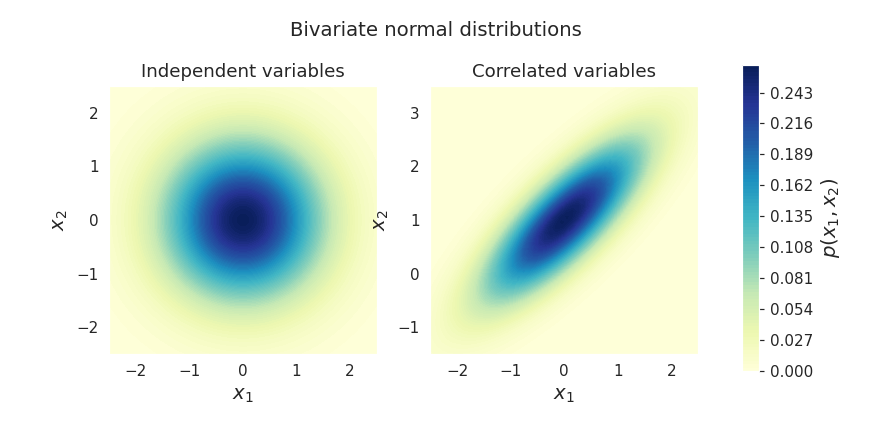

In [67]:
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

# Affine transformations of the multivariate normal

It is possible to transform as multivariate normal distribution into a new normal distribution with an affine transformation. More specifically if $X$ is normally distributed and $Y=LX + u$ with $L$ a linear transformation and $u$ a vector then $Y$ is also normally distributed with mean $\mu_Y = u + L\mu_x$ and covariance matrix $\Sigma_Y = L\Sigma_XL^T$.

$$\begin{aligned}
Y &\sim \mathcal{N}(\mu_Y, \Sigma_Y) & X \sim \mathcal{N}(\mu_X, \Sigma_X)
\end{aligned}$$

$$\mathcal{N}(\mu_Y, \Sigma_Y) = \mathcal{N}(u + L\mu_X, L\Sigma_XL^T) = L\mathcal{N}(\mu_x, \Sigma_X)+ u$$

# Sampling from a multivariate normal

The previous formula helps us to smaple from any multivariate gaussian. To do the sampling we can sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu = 0$ and the covariance is the identity matrix $\Sigma = I_d$. Sampling from this distribution is easier because each variable in $X$ is independent from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_Y, \Sigma_Y)$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = LX + u$ where we know from the previous sections that the covariance of $Y$ will be $\Sigma_Y = L\Sigma_XL^T$. Since $\Sigma_X = I_d$ we can write that $\Sigma_Y = LI_dL^T=LL^T$.

$L$ can now be found by a technique called Cholesky decomposition which does exactly the decomposition we need. The vector $u$ is then $\mu_Y$ since $\mu_X=0$ ($u=\mu_Y-L\mu_X$).

Let's try this out by sampling 50 samples from:

$$\begin{eqnarray*}
\mathcal{N}\left(\left[\begin{array}{c}
0\\
1
\end{array}\right],\left[\begin{array}{ccc}
1 & 0.8\\
0.8 & 1
\end{array}\right]\right)
\end{eqnarray*}$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below. 


In [ ]:
# Sample from:
d = 2 # number of dimensions

mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8],
    [0.8, 1.]
])

# Create L
L = np.linalg.cholesky(covariance)
# Sample X form standard normal
n=50 # samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean

<IPython.core.display.Javascript object>


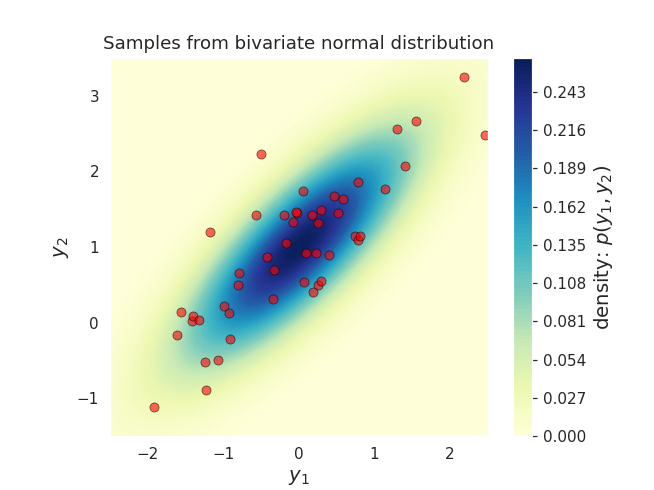

In [88]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#

# Marginal and Conditional normal distributions

If both $x$ and $y$ are jointly normal random vectors defined as:

$$\begin{eqnarray*}
\left[\begin{array}{c}
x\\
y
\end{array}\right] \sim 
\mathcal{N}\left(\left[\begin{array}{c}
\mu_x\\
\mu_y
\end{array}\right],\left[\begin{array}{ccc}
A & C\\
C^T & B
\end{array}\right]\right) = \mathcal{N}(\mu, \Sigma), \qquad 
\Sigma^{-1} = \Lambda = \left[\begin{array}{ccc}
\tilde{A} & \tilde C\\
\tilde C^T & \tilde B
\end{array}\right]
\end{eqnarray*}$$


In [90]:
d = 2 # number of dimensions
mean = np.matrix([[0.], [1.]])
cov = np.matrix([
    [1, 0.8],
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]

# Get the blocks (single values in this case) from the 
# covariance matrix

A = cov[0,0]
B = cov[1,1]
C = cov[0,1] # =C.T in this case

## Marginal distribution

A marginal distribution is the distribution of a subset of random variables from the original distribution. It represents the probabilities or densities of the variables in the subset without reference to the other values in the original distribution.

In our case of the 2D multivariate normal the marginal distributions are the univariate distributions of each component $x$ and $y$ separately. They are defined as:

$$\begin{aligned}
p(x) = \mathcal{N}(\mu_x, A) \\
p(y) = \mathcal{N}(\mu_y, B)
\end{aligned}$$

In [92]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

<IPython.core.display.Javascript object>


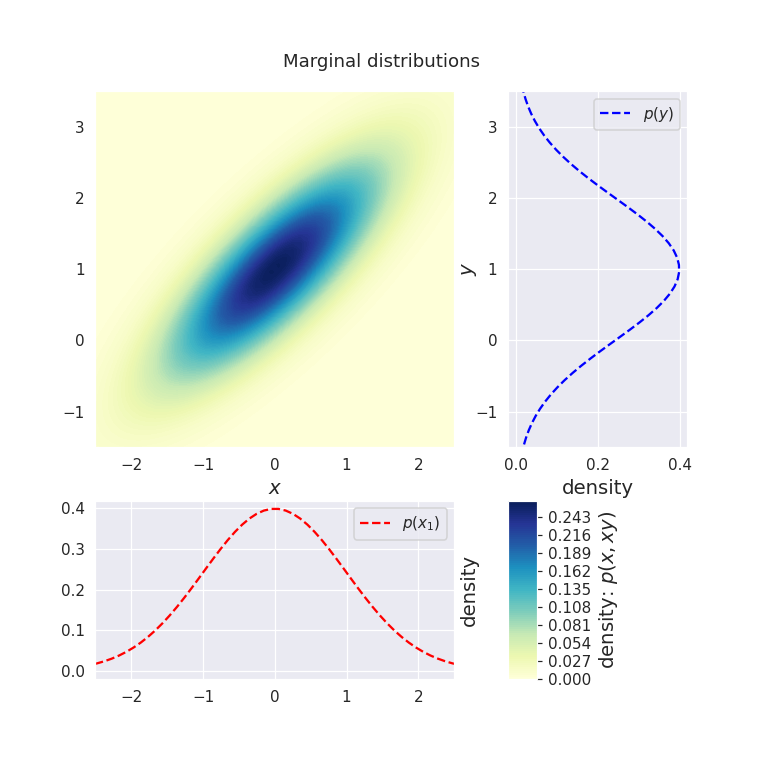

In [93]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mean_y, A)
# Plot univariate distribution
ax2.plot(py, y, 'b--', label=f'$p(y)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mean_x, B)
# Plot univariate distribution
ax3.plot(x, px, 'r--', label=f'$p(x_1)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, xy)$', fontsize=13)
plt.show()
#

## Conditional distribution

The conditional distribution of $x$ given $y$ is defined as:

$$p(x|y) = \mathcal{N}(\mu_{x|y},\Sigma_{x|y})$$

with,

$$\begin{aligned}
\Sigma_{x|y} &= A - CB^{-1}C^T = \tilde A^{-1} \\
\mu_{x|y} &= \mu_x + CB^{-1}(y-\mu_y)
\end{aligned}$$

with $A - CB^{-1}C^T = \tilde A^{-1}$ the Schur complement of B in $\Sigma$. The computation of the conditional covariance matrix $\Sigma_{x|y}$ can be viewed as inverting the covariance matrix $\Sigma^{-1} = \Lambda$, dropping the rows and columns corresponding to the variables $y$ that are being conditioned upon (selecting $\tilde A$), and inverting back to get the conditional covariance matrix $\Sigma_{x|y}=\tilde A^{-1}$.

The shift of the mean can be seen as getting the residual of the variable conditioned upon $(y - \mu_y)$, normalizing this with the covariance $B$ of the variable conditioned upon, and transforming it to the space of $x$ by the covariances between $x$ and $y$($C$).

In [94]:
# Calculate x|y
y_condition = 1.
mean_xgiveny = mean_x + (C*(1/B)*(y_condition - mean_y))
cov_xgiveny = A - C*(1/B) * C

# Calculate y|x
x_condition=-1
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

<IPython.core.display.Javascript object>


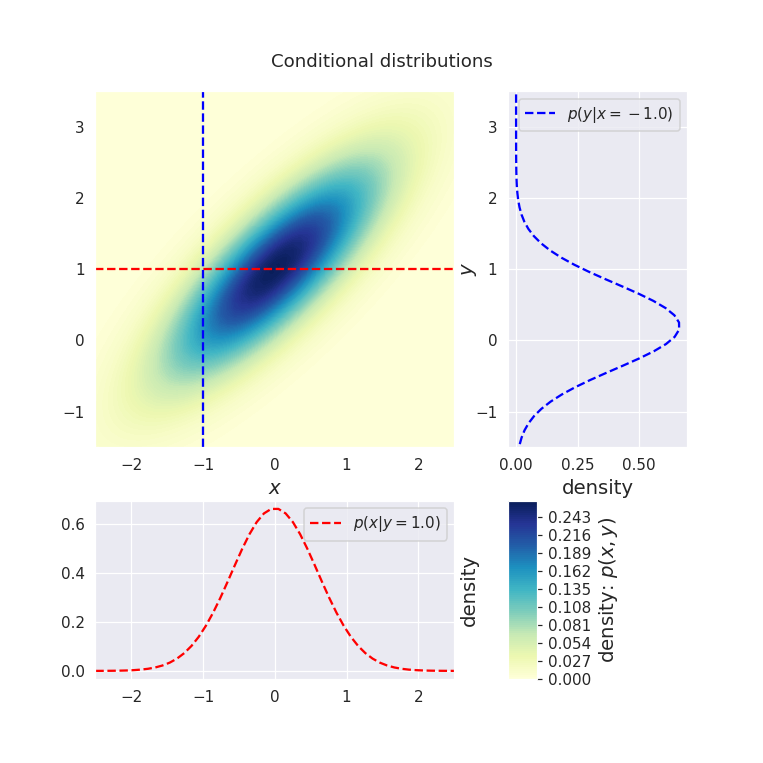

In [95]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.YlGnBu)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=100)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, 'b--', 
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=100)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, 'r--', 
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()